# ANFIS para função y = x²


In [1]:
import  random
import  numpy as np
from neuro_fuzzy.fis import Anfis


## Geração dos dados de treino e validação

In [2]:
xt = []
ydt = []
n_pontos_treinamento = 500
for k in range(n_pontos_treinamento):
    x = 2 - 4 * random.random()
    y = x ** 2
    xt.append([x])
    ydt.append(y)

xv = []
ydv = []
temp = np.arange(-2, 2.001, 0.001)
for i in range(len(temp)):
    xv.append([temp[i]])
    ydv.append(temp[i]**2)

n_epoca = 15
m = 5
n = len(xt[0])

## Geração de parâmetros aleatórios

In [3]:
def geracao_parametros_aleatorios(n, m):
    c = []
    s = []
    p = []
    q = []

    x_max = max(xt)
    x_min = min(xt)

    for i in range(n):
        media_entrada_regra = []
        desvio_padrao_entrada_regra = []
        p_entrada_regra = []
        for j in range(m):
            media = x_min[i] + ((x_max[i] - x_min[i]) * random.random())
            media_entrada_regra.append(media)
            desvio_padrao = (x_max[i] - x_min[i]) * random.random()
            desvio_padrao_entrada_regra.append(desvio_padrao)
            parametro_p = random.random()
            p_entrada_regra.append(parametro_p)
        c.append(media_entrada_regra)
        s.append(desvio_padrao_entrada_regra)
        p.append(p_entrada_regra)

    for j in range(m):
        q.append(random.random())

    return c, s, p, q

c, s, p, q = geracao_parametros_aleatorios(n, m)
label_y_validacao = "x²"

sistema_adaptativo = Anfis(n_epoca, xt, ydt, xv, ydv, m, c, s, p, q, label_y_validacao)

## Visualização do estado inicial

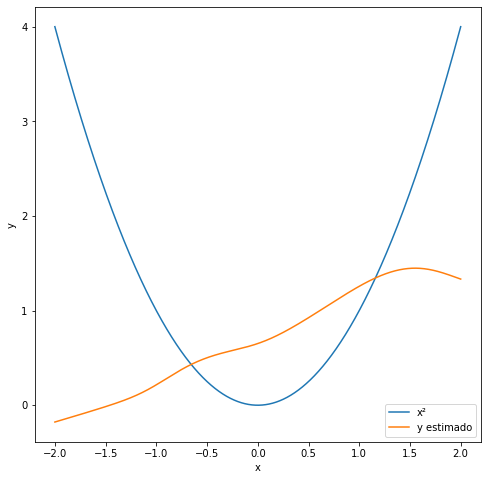

Erro quadrático médio:  2.155046294956494


In [4]:
sistema_adaptativo.apresentar_resultado_validacao()

## Neurofuzzy por meio de backpropagation aplicando o método gradiente

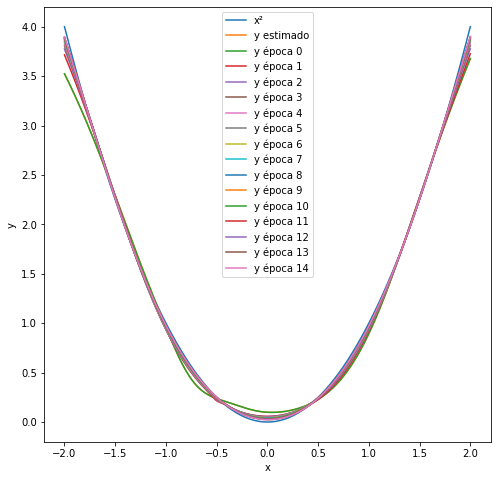

In [5]:
sistema_adaptativo.treinar_gradiente(plota_resultado_epocas=True)

## Visualização do resultado final

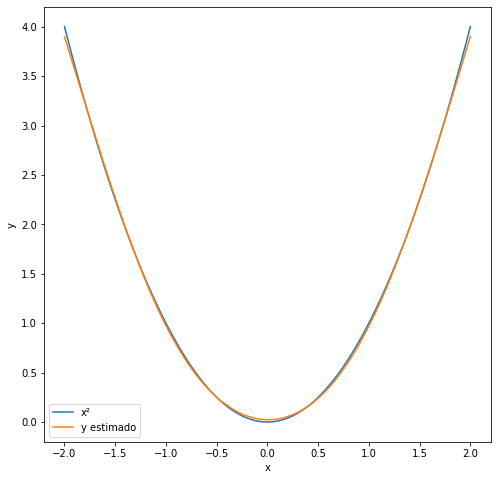

Erro quadrático médio:  0.0005878769206113973


In [6]:
sistema_adaptativo.apresentar_resultado_validacao()